In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

<h3>Feature Selection</h3>

In [6]:
df_copy = pd.DataFrame()

columns_to_add = ['Age', 'DistanceFromHome', 'MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole']

for element in columns_to_add:
    df_copy[element] = df[element]
    
df_copy

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,0.809524,0.285714,0.231122,0.286171,0.40,0.4375
1,0.428571,0.000000,0.233476,0.147183,0.05,0.5000
2,0.166667,0.535714,0.747017,0.144644,0.05,0.3125
3,0.357143,0.142857,0.435214,0.068878,0.15,0.4375
4,0.309524,0.285714,0.142192,0.204325,0.50,0.1250
...,...,...,...,...,...,...
878,0.476190,0.392857,0.453907,0.166769,0.50,0.0000
879,0.452381,0.535714,0.088947,0.042558,0.85,0.0000
880,0.357143,0.178571,0.436931,0.159227,0.55,0.4375
881,0.357143,0.107143,0.323273,0.057373,0.15,0.1250


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyHours        883 non-null    float64
 3   MonthlyIncome       883 non-null    float64
 4   YearsAtCompany      883 non-null    float64
 5   YearsInCurrentRole  883 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


In [8]:
df_copy.describe()

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.292914,0.368545,0.227927,0.316308,0.244975
std,0.196813,0.294351,0.230461,0.209842,0.226178,0.214712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.185135,0.079383,0.150000,0.125000
50%,0.404762,0.214286,0.329663,0.156611,0.250000,0.187500
75%,0.571429,0.464286,0.502469,0.301351,0.450000,0.437500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert the DataFrame to a numpy array:
train_data = df_copy.values

In [10]:
train_data

array([[0.80952381, 0.28571429, 0.23112189, 0.28617054, 0.4       ,
        0.4375    ],
       [0.42857143, 0.        , 0.23347612, 0.14718332, 0.05      ,
        0.5       ],
       [0.16666667, 0.53571429, 0.74701738, 0.14464368, 0.05      ,
        0.3125    ],
       ...,
       [0.35714286, 0.17857143, 0.43693136, 0.15922734, 0.55      ,
        0.4375    ],
       [0.35714286, 0.10714286, 0.32327327, 0.05737263, 0.15      ,
        0.125     ],
       [0.64285714, 0.07142857, 0.32514957, 0.12990611, 0.5       ,
        0.25      ]])

In [11]:
type(train_data)

numpy.ndarray

<h3>K-means (third try)</h3>

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.33425495985878 silhouette =  0.185093752292134

k =  5 SSE =  157.37556277889087 silhouette =  0.1880542099452586

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.96072735745915 silhouette =  0.18085632057016668

k =  8 SSE =  127.19614618570515 silhouette =  0.18290274707663132

k =  9 SSE =  120.52189082650496 silhouette =  0.1844497916183667

k =  10 SSE =  115.28291171288154 silhouette =  0.16832500843343162

k =  11 SSE =  111.2122207759135 silhouette =  0.16884393738410594

k =  12 SSE =  107.04673133046091 silhouette =  0.16389897706053758

k =  13 SSE =  103.8058523534751 silhouette =  0.16826214672460268

k =  14 SSE =  99.7542318524969 silhouette =  0.16798814272346224

k =  15 SSE =  96.78426845171938 silhouette =  0.16933512976669884

k =  16 SSE =  93.75451436721997 silhouette =  0.1669445

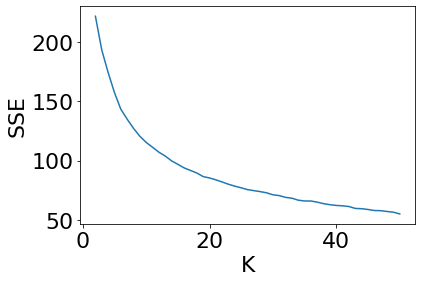

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.36831209968673 silhouette =  0.1849004601228035

k =  5 SSE =  157.39098239227087 silhouette =  0.1865992704846994

k =  6 SSE =  143.35866972391452 silhouette =  0.1925631844234883

k =  7 SSE =  134.57237215438417 silhouette =  0.18853501634225805

k =  8 SSE =  127.26910175402799 silhouette =  0.18372442101382994

k =  9 SSE =  120.58874925729108 silhouette =  0.17973449095504665

k =  10 SSE =  115.35043328457797 silhouette =  0.1666929419897891

k =  11 SSE =  111.86821582131783 silhouette =  0.17211848482846306

k =  12 SSE =  107.63783786634441 silhouette =  0.16700645967082822

k =  13 SSE =  103.39880363401387 silhouette =  0.17492387401333956

k =  14 SSE =  100.0161538549017 silhouette =  0.1701633966067919

k =  15 SSE =  97.4630283795215 silhouette =  0.1665015113129356

k =  16 SSE =  93.7151292762388 silhouette =  0.169897

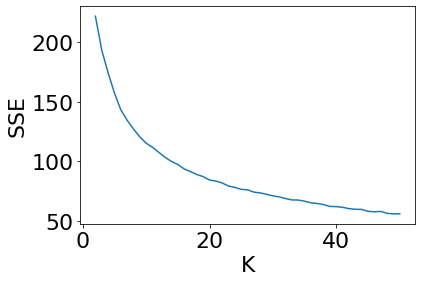

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.34713457593128 silhouette =  0.18577456013314017

k =  5 SSE =  157.3770855542977 silhouette =  0.1882839996564821

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  134.92698756595072 silhouette =  0.1847569488227477

k =  8 SSE =  127.50436924044791 silhouette =  0.18223786892516286

k =  9 SSE =  120.50722346406556 silhouette =  0.18410449333457773

k =  10 SSE =  115.9622107315035 silhouette =  0.18050218581628188

k =  11 SSE =  111.56782315225813 silhouette =  0.16906079738680327

k =  12 SSE =  107.01728171346647 silhouette =  0.1674710459999683

k =  13 SSE =  103.32227376815558 silhouette =  0.15969804652061426

k =  14 SSE =  100.10766720140555 silhouette =  0.17163689921303235

k =  15 SSE =  96.5980219099795 silhouette =  0.16938680361426847

k =  16 SSE =  94.22551338716809 silhouette =  0.16345

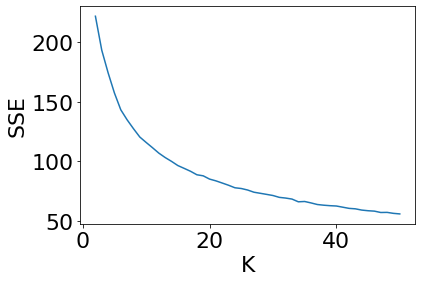

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.34096151624058 silhouette =  0.18548018473837538

k =  5 SSE =  157.3771973874583 silhouette =  0.18893295891522677

k =  6 SSE =  143.33247094894585 silhouette =  0.19231792362445055

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.18733012686364 silhouette =  0.18344125064434055

k =  9 SSE =  120.49021813856919 silhouette =  0.18446403713911005

k =  10 SSE =  115.63080274204758 silhouette =  0.16973347203893815

k =  11 SSE =  110.76785495824609 silhouette =  0.16476898102232118

k =  12 SSE =  106.56866994981361 silhouette =  0.1697645362685082

k =  13 SSE =  102.60666856749614 silhouette =  0.17572448251075512

k =  14 SSE =  100.44824958630849 silhouette =  0.16541789325408557

k =  15 SSE =  96.06089269199317 silhouette =  0.1718550172160968

k =  16 SSE =  93.37446424225415 silhouette =  0.1

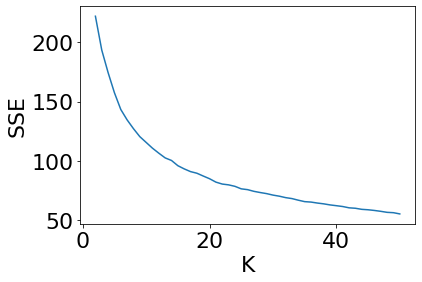

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.38104023768372 silhouette =  0.18533927483961726

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.16038377444283 silhouette =  0.1793255710054592

k =  9 SSE =  120.50297855734328 silhouette =  0.18447756730362394

k =  10 SSE =  115.22850932082265 silhouette =  0.1665763876754285

k =  11 SSE =  111.45593196718829 silhouette =  0.16308603599099855

k =  12 SSE =  107.86335852569928 silhouette =  0.1606552684674146

k =  13 SSE =  102.69412267923957 silhouette =  0.1694304992837407

k =  14 SSE =  99.7585282777953 silhouette =  0.1677575896057465

k =  15 SSE =  96.2801193782383 silhouette =  0.1699984366115534

k =  16 SSE =  93.24914452826069 silhouette =  0.170185

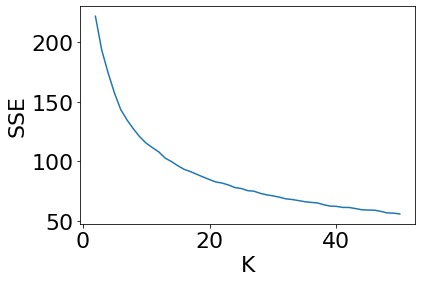

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23061940498116 silhouette =  0.19106177686702988

k =  5 SSE =  157.38168709141263 silhouette =  0.18548526042696056

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.72464976471818 silhouette =  0.1878349867327217

k =  8 SSE =  127.31559974910074 silhouette =  0.1791090344577527

k =  9 SSE =  120.49722542842464 silhouette =  0.1844786506284768

k =  10 SSE =  115.8880326009815 silhouette =  0.174526686342775

k =  11 SSE =  110.7109466770656 silhouette =  0.16850283449912143

k =  12 SSE =  107.99580526772671 silhouette =  0.17356068833316174

k =  13 SSE =  103.42558478554565 silhouette =  0.1693481379950704

k =  14 SSE =  99.42621884456209 silhouette =  0.17165086841407287

k =  15 SSE =  97.34767437339966 silhouette =  0.16344342209315088

k =  16 SSE =  93.89068383593678 silhouette =  0.1671729

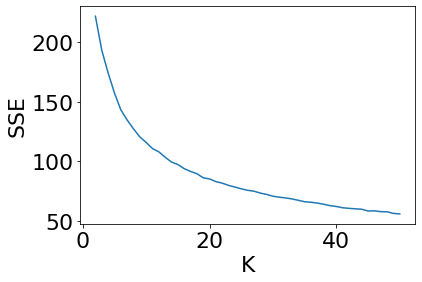

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23080826189084 silhouette =  0.19056409727718673

k =  5 SSE =  157.40788105773603 silhouette =  0.1865738391638744

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  135.811403962519 silhouette =  0.1855386779132881

k =  8 SSE =  127.31416099657757 silhouette =  0.18736939718889273

k =  9 SSE =  120.33374994959469 silhouette =  0.1908777601049881

k =  10 SSE =  115.2232617073465 silhouette =  0.1666677880301782

k =  11 SSE =  110.54453124862891 silhouette =  0.16920368322668652

k =  12 SSE =  106.6740766815316 silhouette =  0.16673501445570812

k =  13 SSE =  103.44427183249509 silhouette =  0.16805561984065367

k =  14 SSE =  100.14171787052415 silhouette =  0.17069046868564178

k =  15 SSE =  97.19935994264817 silhouette =  0.17032142499222538

k =  16 SSE =  94.6333396858853 silhouette =  0.1726662

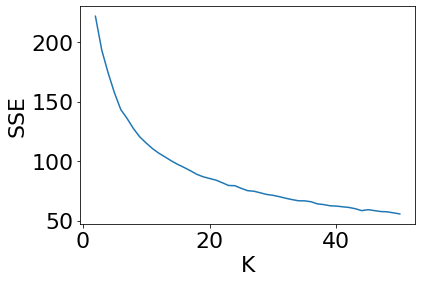

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27941522330212 silhouette =  0.18681140354887998

k =  4 SSE =  174.21927597337705 silhouette =  0.18990614756155444

k =  5 SSE =  157.36809697041232 silhouette =  0.1879469344887709

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  134.5741799639103 silhouette =  0.18879241769204802

k =  8 SSE =  127.32131781294648 silhouette =  0.1822334075562683

k =  9 SSE =  120.46546391894461 silhouette =  0.18513680959711287

k =  10 SSE =  116.25050637793 silhouette =  0.17565117313411527

k =  11 SSE =  111.4998659489316 silhouette =  0.16468720204332676

k =  12 SSE =  106.44783292288905 silhouette =  0.17260891646223525

k =  13 SSE =  103.71933437773833 silhouette =  0.16382503500826154

k =  14 SSE =  100.40401171652039 silhouette =  0.1623772122707162

k =  15 SSE =  97.42657044734517 silhouette =  0.17042839926429

k =  16 SSE =  93.23249920209274 silhouette =  0.172403644

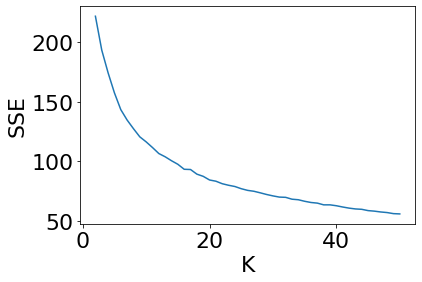

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.275179006017 silhouette =  0.18636258393302177

k =  4 SSE =  174.23061940498118 silhouette =  0.19106177686702988

k =  5 SSE =  157.37881056490045 silhouette =  0.18517303331266233

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57433964765582 silhouette =  0.1888109742158358

k =  8 SSE =  127.17818469834413 silhouette =  0.17913932726815626

k =  9 SSE =  120.37721822196404 silhouette =  0.1885329607863606

k =  10 SSE =  115.32905083117089 silhouette =  0.16500407927276112

k =  11 SSE =  111.69640714638119 silhouette =  0.16674562080972216

k =  12 SSE =  107.37139524494886 silhouette =  0.1714980402756502

k =  13 SSE =  103.49157971428227 silhouette =  0.16471712450109763

k =  14 SSE =  100.30828278776758 silhouette =  0.16512210893530793

k =  15 SSE =  96.84256672517493 silhouette =  0.1705269108142506

k =  16 SSE =  93.88209946533713 silhouette =  0.16

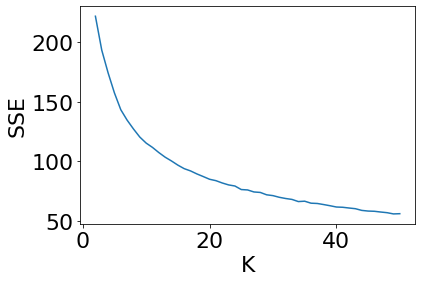

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.21920279649552 silhouette =  0.1902250192859923

k =  5 SSE =  157.39657849038764 silhouette =  0.18957963603096833

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.11234903936656 silhouette =  0.18394566130585532

k =  9 SSE =  120.57935113850483 silhouette =  0.18374099297183158

k =  10 SSE =  115.36371293438528 silhouette =  0.16251111270829266

k =  11 SSE =  111.36427904007758 silhouette =  0.1694996048339031

k =  12 SSE =  106.47187592786227 silhouette =  0.17178440859882313

k =  13 SSE =  102.89814178293719 silhouette =  0.16926371055209455

k =  14 SSE =  99.62487070950726 silhouette =  0.17149809621422457

k =  15 SSE =  96.65133233918992 silhouette =  0.16303578464802398

k =  16 SSE =  93.33778526286119 silhouette =  0.

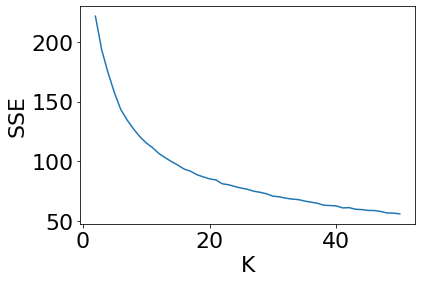

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.21904793507792 silhouette =  0.1900798722853192

k =  5 SSE =  157.3694134287024 silhouette =  0.18915409236358954

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.57075021360907 silhouette =  0.19117818047765786

k =  8 SSE =  127.21922693423171 silhouette =  0.18436104733563527

k =  9 SSE =  120.34987559733175 silhouette =  0.19012810949039605

k =  10 SSE =  115.26136306068837 silhouette =  0.1668062715441996

k =  11 SSE =  111.61550669603025 silhouette =  0.16958070115085452

k =  12 SSE =  106.4135676796772 silhouette =  0.17180997590811806

k =  13 SSE =  103.49594610714492 silhouette =  0.1638745727720514

k =  14 SSE =  99.97796950265618 silhouette =  0.17006415103144848

k =  15 SSE =  96.69214254480985 silhouette =  0.16744339390260093

k =  16 SSE =  94.52356694526507 silhouette =  0.1669

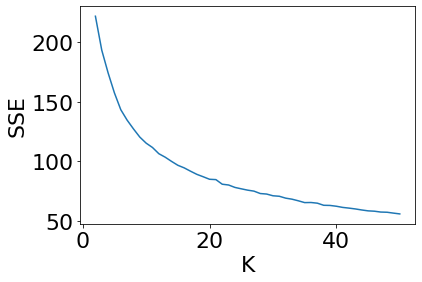

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.5288073120176 silhouette =  0.18052898392813693

k =  5 SSE =  157.384976552426 silhouette =  0.1892812384613232

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.57481749098267 silhouette =  0.18867783572135718

k =  8 SSE =  127.32982291888686 silhouette =  0.1857615838679764

k =  9 SSE =  121.4020749794843 silhouette =  0.18369145524948513

k =  10 SSE =  115.5876565991886 silhouette =  0.17124580687979934

k =  11 SSE =  110.60271737398669 silhouette =  0.1658709701487149

k =  12 SSE =  106.55248242355759 silhouette =  0.17108871311710155

k =  13 SSE =  103.42941668381665 silhouette =  0.16517462602469288

k =  14 SSE =  100.16192147128734 silhouette =  0.16561416946870325

k =  15 SSE =  98.59580500731447 silhouette =  0.16227481464175977

k =  16 SSE =  94.3684213941602 silhouette =  0.1640091

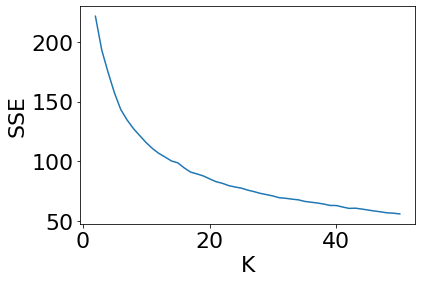

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.2305942780664 silhouette =  0.1899562187823003

k =  5 SSE =  157.3723537134957 silhouette =  0.1890932754112058

k =  6 SSE =  143.3569709187925 silhouette =  0.19302987779820274

k =  7 SSE =  134.57660466699576 silhouette =  0.18832545586710342

k =  8 SSE =  127.20553062728902 silhouette =  0.17872292353742364

k =  9 SSE =  120.60585397047596 silhouette =  0.17977158749759323

k =  10 SSE =  115.3029715951091 silhouette =  0.16558357977275598

k =  11 SSE =  111.10964899302152 silhouette =  0.17675152599842497

k =  12 SSE =  106.6484683665246 silhouette =  0.16886054237759687

k =  13 SSE =  102.51736582261343 silhouette =  0.1743542249457273

k =  14 SSE =  99.59691559659498 silhouette =  0.1637434202904672

k =  15 SSE =  96.75229322492748 silhouette =  0.16478391185810576

k =  16 SSE =  93.30175789660998 silhouette =  0.1742270

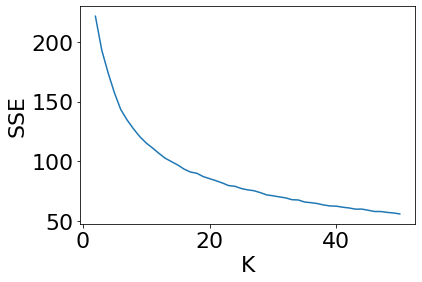

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.2200267572521 silhouette =  0.1906138659224447

k =  5 SSE =  157.36592466614582 silhouette =  0.18807408434531628

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.78252561616276 silhouette =  0.18778831833139648

k =  8 SSE =  127.22706129123897 silhouette =  0.18317454176778755

k =  9 SSE =  120.41902513079675 silhouette =  0.1876656644678922

k =  10 SSE =  115.26808122066213 silhouette =  0.16664511896505327

k =  11 SSE =  111.20621540143686 silhouette =  0.1758197152684601

k =  12 SSE =  106.7133830512571 silhouette =  0.16736157785250136

k =  13 SSE =  104.29073106274875 silhouette =  0.1632134162913707

k =  14 SSE =  100.14609657503178 silhouette =  0.16497000346693125

k =  15 SSE =  97.8382333169502 silhouette =  0.16453012407914655

k =  16 SSE =  93.5513797178291 silhouette =  0.16491

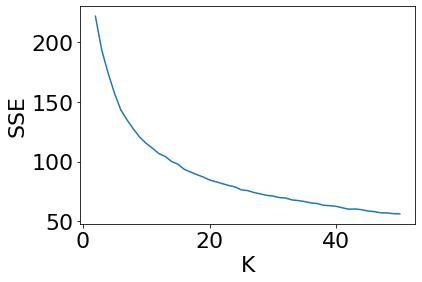

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.33839935100326 silhouette =  0.18608078387776592

k =  5 SSE =  157.36592466614582 silhouette =  0.18807408434531628

k =  6 SSE =  143.33253357455837 silhouette =  0.19194677184879494

k =  7 SSE =  134.92697148030751 silhouette =  0.17676323817929515

k =  8 SSE =  127.22253619481782 silhouette =  0.1825666894226368

k =  9 SSE =  120.65775178083028 silhouette =  0.18442451130352333

k =  10 SSE =  115.30441214327254 silhouette =  0.1665556912943009

k =  11 SSE =  110.93781176505992 silhouette =  0.16599307318216772

k =  12 SSE =  106.73165434478472 silhouette =  0.171891581808163

k =  13 SSE =  103.64449472648823 silhouette =  0.16777681888848728

k =  14 SSE =  100.30569268835218 silhouette =  0.16640530909668674

k =  15 SSE =  96.47323997888394 silhouette =  0.17213251094876353

k =  16 SSE =  93.59688202569954 silhouette =  0.1

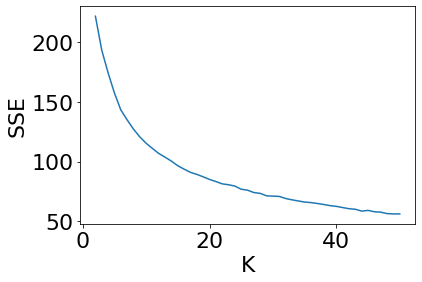

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.2529746853668 silhouette =  0.19064574127158213

k =  5 SSE =  157.39430733308714 silhouette =  0.18792512701339423

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.57237215438417 silhouette =  0.18853501634225805

k =  8 SSE =  127.15927279056541 silhouette =  0.18582175234783274

k =  9 SSE =  120.36480539269196 silhouette =  0.18877544635495588

k =  10 SSE =  115.27459833847679 silhouette =  0.16675866577758036

k =  11 SSE =  111.4132116977557 silhouette =  0.17105422636163464

k =  12 SSE =  107.86225469117191 silhouette =  0.16638980516919802

k =  13 SSE =  104.03702981431304 silhouette =  0.17285219272079466

k =  14 SSE =  100.01972073598539 silhouette =  0.16297493699927235

k =  15 SSE =  96.79128785849146 silhouette =  0.16443094002609102

k =  16 SSE =  93.57937388387745 silhouette =  0.1

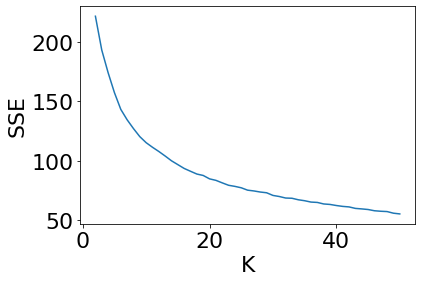

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.33839935100326 silhouette =  0.18608078387776592

k =  5 SSE =  157.3686241582732 silhouette =  0.18915409236358954

k =  6 SSE =  143.3340132352308 silhouette =  0.1928696547463517

k =  7 SSE =  135.20962810266082 silhouette =  0.1781527772638222

k =  8 SSE =  127.15749524456912 silhouette =  0.1852238337136734

k =  9 SSE =  120.45030037208541 silhouette =  0.18594278672164372

k =  10 SSE =  115.54870281316228 silhouette =  0.16990002731412396

k =  11 SSE =  111.25447170327867 silhouette =  0.16777954397452036

k =  12 SSE =  106.60176375896535 silhouette =  0.1720611340296509

k =  13 SSE =  103.41784289508125 silhouette =  0.165504210785555

k =  14 SSE =  99.94050458388062 silhouette =  0.16246850132110702

k =  15 SSE =  96.65281842860679 silhouette =  0.16845001947636895

k =  16 SSE =  94.35953541761336 silhouette =  0.164522

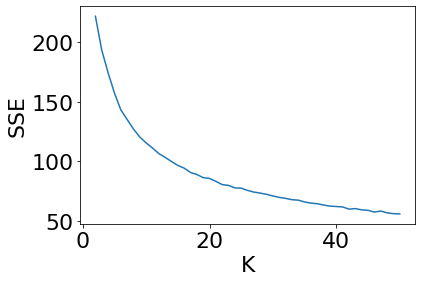

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.23239018732463 silhouette =  0.1908431715006176

k =  5 SSE =  157.384976552426 silhouette =  0.1892812384613232

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.878099874874 silhouette =  0.17887765645285553

k =  8 SSE =  127.10248670561967 silhouette =  0.18537980471138388

k =  9 SSE =  120.34991888992374 silhouette =  0.1879623236511948

k =  10 SSE =  115.53417355817676 silhouette =  0.18857796071186297

k =  11 SSE =  111.33422105630319 silhouette =  0.1665645346051937

k =  12 SSE =  107.24041969131702 silhouette =  0.16227488486909958

k =  13 SSE =  103.53457020689453 silhouette =  0.1579780308902267

k =  14 SSE =  99.18536719804877 silhouette =  0.1752108841174414

k =  15 SSE =  96.37654560106051 silhouette =  0.1722641522957275

k =  16 SSE =  93.15267348005908 silhouette =  0.172553568

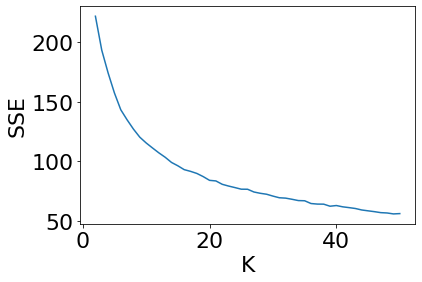

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28203917310856 silhouette =  0.18645706860401332

k =  4 SSE =  174.22023853551198 silhouette =  0.1902250192859923

k =  5 SSE =  157.3691529621034 silhouette =  0.1864356386406986

k =  6 SSE =  143.35771138521633 silhouette =  0.19301988129681852

k =  7 SSE =  134.57997168185562 silhouette =  0.19137299222581539

k =  8 SSE =  127.30763235835266 silhouette =  0.17889264843953182

k =  9 SSE =  120.39878638114712 silhouette =  0.18853287695367452

k =  10 SSE =  115.50135846336991 silhouette =  0.1896067570770324

k =  11 SSE =  111.20000488871932 silhouette =  0.17402752787103012

k =  12 SSE =  107.07249759737151 silhouette =  0.1724733710980239

k =  13 SSE =  103.36851135756545 silhouette =  0.16400561796815155

k =  14 SSE =  99.59907380647144 silhouette =  0.16230159378145573

k =  15 SSE =  97.006438240805 silhouette =  0.1671652271160513

k =  16 SSE =  94.70641054392999 silhouette =  0.16573

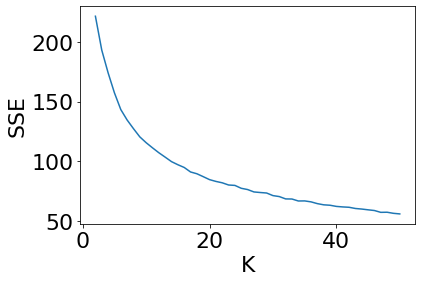

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.21904793507792 silhouette =  0.1900798722853192

k =  5 SSE =  157.39657849038764 silhouette =  0.18957963603096833

k =  6 SSE =  143.3317032511534 silhouette =  0.1922003444400098

k =  7 SSE =  134.9524435816266 silhouette =  0.18480656488988967

k =  8 SSE =  127.19826909912928 silhouette =  0.18449380268900997

k =  9 SSE =  120.68983290590536 silhouette =  0.1833767349124545

k =  10 SSE =  115.86604643360971 silhouette =  0.185740499970149

k =  11 SSE =  111.16700351652463 silhouette =  0.16317005821180836

k =  12 SSE =  106.73815958462302 silhouette =  0.1697140473850671

k =  13 SSE =  102.48019412961536 silhouette =  0.1745630980403286

k =  14 SSE =  99.77791687218478 silhouette =  0.1715780108882497

k =  15 SSE =  96.27553955100237 silhouette =  0.16726221339222122

k =  16 SSE =  94.54921957603004 silhouette =  0.16357250

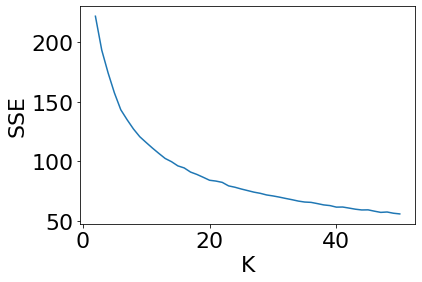

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.22905270009252 silhouette =  0.19002344868068527

k =  5 SSE =  157.3882269411696 silhouette =  0.18703480602176348

k =  6 SSE =  143.3338174170033 silhouette =  0.19265134585157245

k =  7 SSE =  134.57345582875334 silhouette =  0.18841091469960666

k =  8 SSE =  127.29019593281213 silhouette =  0.18407672387820273

k =  9 SSE =  120.34062738946974 silhouette =  0.1899059551341643

k =  10 SSE =  115.76759016140583 silhouette =  0.16959805225134933

k =  11 SSE =  111.48269062745175 silhouette =  0.16689020074662267

k =  12 SSE =  106.95787237302643 silhouette =  0.17072909510708012

k =  13 SSE =  102.4846722116386 silhouette =  0.17443310070359705

k =  14 SSE =  99.85641186086256 silhouette =  0.1752653308345072

k =  15 SSE =  97.22061930107628 silhouette =  0.16514672391356663

k =  16 SSE =  94.96690376860522 silhouette =  0.165

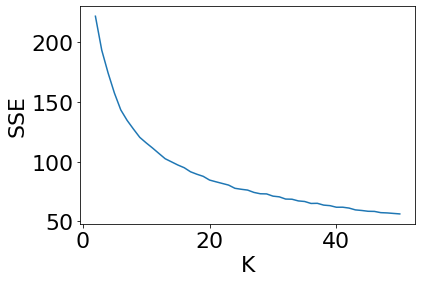

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23670481648705 silhouette =  0.19042043148322857

k =  5 SSE =  157.36736422840568 silhouette =  0.1879469344887709

k =  6 SSE =  143.3569709187925 silhouette =  0.19302987779820274

k =  7 SSE =  134.57481749098267 silhouette =  0.18867783572135718

k =  8 SSE =  127.51885298171493 silhouette =  0.17942530861189118

k =  9 SSE =  120.37917525906437 silhouette =  0.18991013619206518

k =  10 SSE =  115.30859675243016 silhouette =  0.16535828607220843

k =  11 SSE =  110.56606236555936 silhouette =  0.16891016114648724

k =  12 SSE =  107.27529560812036 silhouette =  0.16078359530396427

k =  13 SSE =  103.23390864684578 silhouette =  0.16930253213038443

k =  14 SSE =  99.89174051831233 silhouette =  0.1638675440774505

k =  15 SSE =  97.5282802755259 silhouette =  0.16349832759261143

k =  16 SSE =  93.33476184637816 silhouette =  0.17

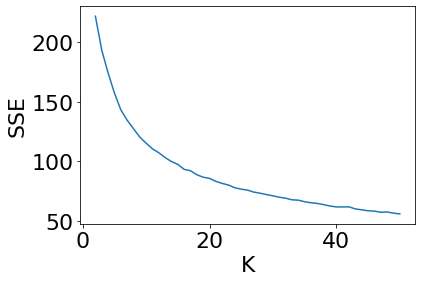

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.3471345759313 silhouette =  0.18577456013314017

k =  5 SSE =  157.40844283404863 silhouette =  0.18834380056354819

k =  6 SSE =  143.70161551477744 silhouette =  0.19511480378605342

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.35141012016022 silhouette =  0.17914357164563294

k =  9 SSE =  120.37988172469119 silhouette =  0.18879431939814004

k =  10 SSE =  115.40280151427936 silhouette =  0.16210841105685092

k =  11 SSE =  111.39872941628445 silhouette =  0.1820337418665098

k =  12 SSE =  107.79100702716957 silhouette =  0.17650836745674345

k =  13 SSE =  103.25301145313318 silhouette =  0.17248204998344563

k =  14 SSE =  100.35676766021 silhouette =  0.17264103771705744

k =  15 SSE =  97.21092202468185 silhouette =  0.16768052829696642

k =  16 SSE =  93.71075063535861 silhouette =  0.168

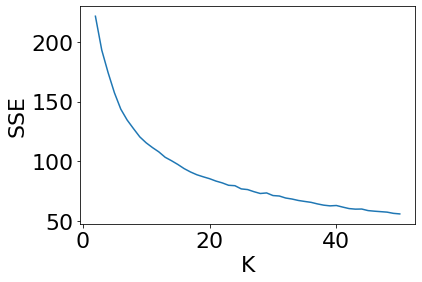

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.25344074326102 silhouette =  0.19040955801669654

k =  5 SSE =  157.37928855422084 silhouette =  0.18726788228882485

k =  6 SSE =  143.3586697239145 silhouette =  0.1925631844234883

k =  7 SSE =  134.66687481569272 silhouette =  0.1889295485218029

k =  8 SSE =  127.21194016471604 silhouette =  0.1848213350461144

k =  9 SSE =  120.34534188836072 silhouette =  0.18933700940254194

k =  10 SSE =  115.31290548790474 silhouette =  0.16278723398260683

k =  11 SSE =  111.29417714152407 silhouette =  0.16773283198118707

k =  12 SSE =  106.52326036043473 silhouette =  0.1711280600965607

k =  13 SSE =  102.80405694854409 silhouette =  0.173378545463583

k =  14 SSE =  99.33715418317735 silhouette =  0.1673882484307925

k =  15 SSE =  96.85224753050456 silhouette =  0.16735131658585542

k =  16 SSE =  93.4416289939477 silhouette =  0.1653920

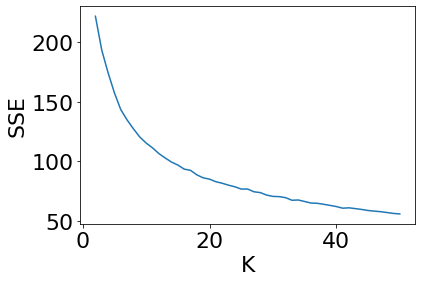

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.2200267572521 silhouette =  0.1906138659224447

k =  5 SSE =  157.39791955162144 silhouette =  0.1896761907965194

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.574636312883 silhouette =  0.19070157107190921

k =  8 SSE =  127.16760397628235 silhouette =  0.1792573575142187

k =  9 SSE =  120.46655265497446 silhouette =  0.18390019959199755

k =  10 SSE =  115.26964673732996 silhouette =  0.16337617837841462

k =  11 SSE =  111.24551306976261 silhouette =  0.17091763598219945

k =  12 SSE =  106.41924251378897 silhouette =  0.17137066660128822

k =  13 SSE =  103.15378055318091 silhouette =  0.16771645427998008

k =  14 SSE =  100.29812828476634 silhouette =  0.16827341565907367

k =  15 SSE =  96.75524229432057 silhouette =  0.16903936653467505

k =  16 SSE =  93.34169232900285 silhouette =  0.173

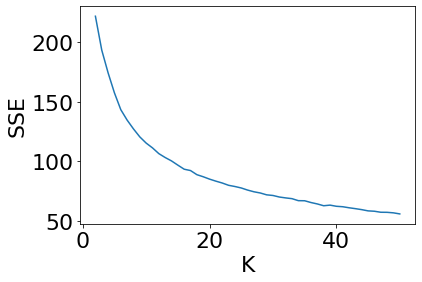

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.23067999601486 silhouette =  0.1898581553702067

k =  5 SSE =  158.23814333701685 silhouette =  0.18626172459584572

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57660466699576 silhouette =  0.18832545586710342

k =  8 SSE =  127.10470696574986 silhouette =  0.18641261551196145

k =  9 SSE =  120.4056479193462 silhouette =  0.1888504116151831

k =  10 SSE =  115.45733956645398 silhouette =  0.17232354739598332

k =  11 SSE =  111.73395132524576 silhouette =  0.18095382162594642

k =  12 SSE =  106.890007415846 silhouette =  0.16872492863291283

k =  13 SSE =  103.7204610386563 silhouette =  0.15785021669337282

k =  14 SSE =  100.05570490360854 silhouette =  0.1659219287774071

k =  15 SSE =  96.33479052207399 silhouette =  0.17090920566505635

k =  16 SSE =  93.23477540479576 silhouette =  0.17115

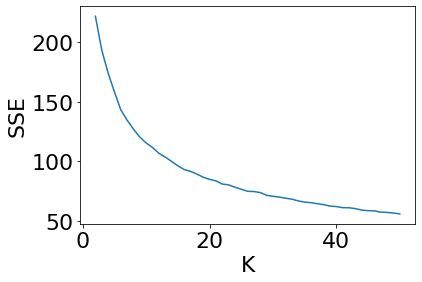

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.2305942780664 silhouette =  0.1899562187823003

k =  5 SSE =  157.38221782285828 silhouette =  0.18919589732380732

k =  6 SSE =  143.3376553932867 silhouette =  0.19223428196873096

k =  7 SSE =  134.6649362294269 silhouette =  0.19011877603355198

k =  8 SSE =  127.22070446443101 silhouette =  0.18200738069131372

k =  9 SSE =  120.46896680165358 silhouette =  0.1886071184537449

k =  10 SSE =  115.69332956878704 silhouette =  0.18327498694299013

k =  11 SSE =  110.65860401869496 silhouette =  0.1679242524978495

k =  12 SSE =  106.90684263464227 silhouette =  0.17131509444137819

k =  13 SSE =  102.49478146956275 silhouette =  0.1745124378809896

k =  14 SSE =  99.29614369607617 silhouette =  0.1721841242861758

k =  15 SSE =  96.7617939720304 silhouette =  0.166533519051224

k =  16 SSE =  93.69695775233464 silhouette =  0.1688392329

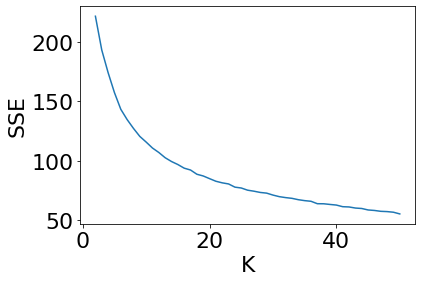

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.3635173968321 silhouette =  0.18576802177084326

k =  5 SSE =  157.36856484605963 silhouette =  0.18595090768069758

k =  6 SSE =  143.35771138521633 silhouette =  0.19301988129681852

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.24848406457984 silhouette =  0.18009948578689372

k =  9 SSE =  120.34256593271408 silhouette =  0.18898601779511318

k =  10 SSE =  115.23593408468092 silhouette =  0.16661813799354006

k =  11 SSE =  111.21848389344896 silhouette =  0.1653627233249545

k =  12 SSE =  107.56705080431695 silhouette =  0.1587344488689215

k =  13 SSE =  103.50322289055524 silhouette =  0.16833833870896991

k =  14 SSE =  99.47256921573359 silhouette =  0.16864371691715913

k =  15 SSE =  96.83298993892033 silhouette =  0.16671790671888548

k =  16 SSE =  93.65024154038299 silhouette =  0.16

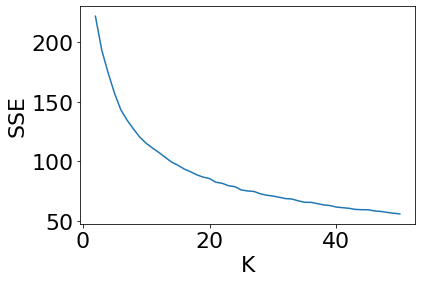

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23636183201793 silhouette =  0.19097286305265246

k =  5 SSE =  157.39791955162144 silhouette =  0.1896761907965194

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.56978066400282 silhouette =  0.19079665130980408

k =  8 SSE =  127.27185829188397 silhouette =  0.1871549442915523

k =  9 SSE =  120.59900959941228 silhouette =  0.1790187457740631

k =  10 SSE =  115.26441118182785 silhouette =  0.16665190035958202

k =  11 SSE =  110.57291611308942 silhouette =  0.16730431102475074

k =  12 SSE =  106.60267876139575 silhouette =  0.171440208056752

k =  13 SSE =  103.58608606254471 silhouette =  0.16638207291129686

k =  14 SSE =  100.46902333671858 silhouette =  0.16495782193649514

k =  15 SSE =  96.30321382544479 silhouette =  0.16728853847148534

k =  16 SSE =  94.86788110626172 silhouette =  0.17

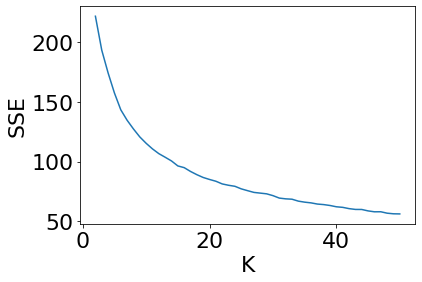

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356405 silhouette =  0.1864350122592963

k =  4 SSE =  174.24451150384044 silhouette =  0.18883733458951996

k =  5 SSE =  157.3686241582732 silhouette =  0.18915409236358954

k =  6 SSE =  143.3332740409822 silhouette =  0.1919388299929591

k =  7 SSE =  134.96744973424194 silhouette =  0.18073273997884026

k =  8 SSE =  127.536949334372 silhouette =  0.18174206248473734

k =  9 SSE =  120.46829329333252 silhouette =  0.18548311155294675

k =  10 SSE =  116.25787202763182 silhouette =  0.19399976996061205

k =  11 SSE =  111.87389748031725 silhouette =  0.18849814419792943

k =  12 SSE =  106.98318743856208 silhouette =  0.16565244935243958

k =  13 SSE =  103.60497583339972 silhouette =  0.17887506391214453

k =  14 SSE =  99.9014989502616 silhouette =  0.17025926860739699

k =  15 SSE =  97.24274023420935 silhouette =  0.16427227174583064

k =  16 SSE =  94.09984770639518 silhouette =  0.1726

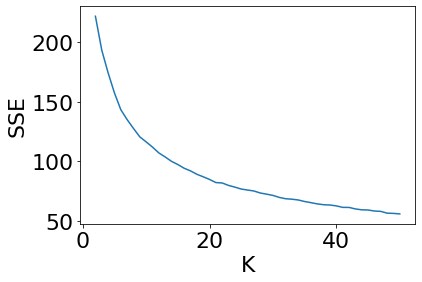

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.22861267125867 silhouette =  0.18981923700764766

k =  5 SSE =  157.37519988908113 silhouette =  0.1866416647250086

k =  6 SSE =  143.46047946102064 silhouette =  0.18701782481421236

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.17993660719722 silhouette =  0.18034185296210853

k =  9 SSE =  120.4768250135555 silhouette =  0.1817023999230828

k =  10 SSE =  115.55423985707345 silhouette =  0.18929710497838173

k =  11 SSE =  111.44859472786315 silhouette =  0.17377430957332943

k =  12 SSE =  106.43278758117924 silhouette =  0.17379056157345096

k =  13 SSE =  103.22951653470886 silhouette =  0.1608700266468213

k =  14 SSE =  99.45588039704636 silhouette =  0.17266729975211778

k =  15 SSE =  97.1340903789788 silhouette =  0.16873035743055265

k =  16 SSE =  93.65123911540616 silhouette =  0.172

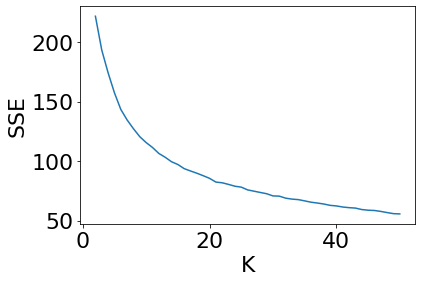

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27724395268322 silhouette =  0.18687956637032344

k =  4 SSE =  174.2373111111463 silhouette =  0.18917178071643068

k =  5 SSE =  158.33207394699997 silhouette =  0.17938430501495461

k =  6 SSE =  143.33247094894585 silhouette =  0.19231792362445055

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.20156099097558 silhouette =  0.17910333824334299

k =  9 SSE =  120.5956682209302 silhouette =  0.18787701110028301

k =  10 SSE =  115.54135543957246 silhouette =  0.1717934470060443

k =  11 SSE =  111.81081426576272 silhouette =  0.1595587378509129

k =  12 SSE =  106.44123592180507 silhouette =  0.1724444984336436

k =  13 SSE =  102.8998154371911 silhouette =  0.17110119743499122

k =  14 SSE =  99.94895788252568 silhouette =  0.17546238537516035

k =  15 SSE =  96.04163176059892 silhouette =  0.17114094861254045

k =  16 SSE =  94.27157612305574 silhouette =  0.168

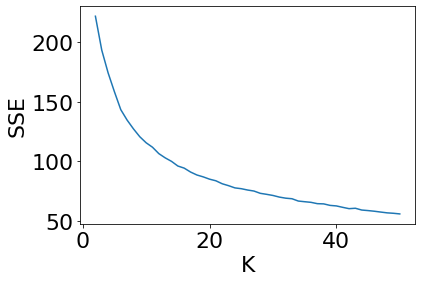

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28329688505414 silhouette =  0.1881114269887075

k =  4 SSE =  174.22893757564728 silhouette =  0.1901888082122367

k =  5 SSE =  157.37888132596098 silhouette =  0.18616835232423207

k =  6 SSE =  143.3347662795845 silhouette =  0.192765395175442

k =  7 SSE =  134.66716546663122 silhouette =  0.1893118159225937

k =  8 SSE =  127.46561485755807 silhouette =  0.1761828007821118

k =  9 SSE =  120.58268246042269 silhouette =  0.1798985333714309

k =  10 SSE =  116.33341854601059 silhouette =  0.1855593303934805

k =  11 SSE =  110.50347589593643 silhouette =  0.16965905354727565

k =  12 SSE =  107.62407252241083 silhouette =  0.172756083047782

k =  13 SSE =  103.80494665681908 silhouette =  0.16814097272436998

k =  14 SSE =  99.85665685656988 silhouette =  0.1670980160751432

k =  15 SSE =  96.73634365129764 silhouette =  0.16737672820581212

k =  16 SSE =  94.54442788339608 silhouette =  0.168666395

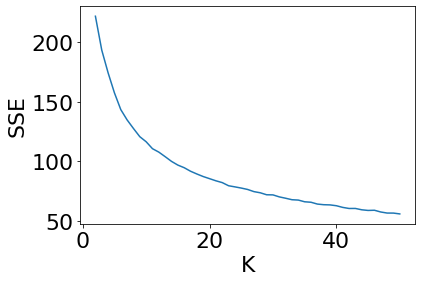

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.25233235989705 silhouette =  0.19043886874164387

k =  5 SSE =  157.39282155803318 silhouette =  0.1885782416300215

k =  6 SSE =  143.35874613711962 silhouette =  0.19313602060591076

k =  7 SSE =  134.57237215438414 silhouette =  0.18853501634225805

k =  8 SSE =  127.32971383618364 silhouette =  0.1889879390175823

k =  9 SSE =  120.46719862830147 silhouette =  0.1832066858536921

k =  10 SSE =  115.89373766543575 silhouette =  0.18091150483938234

k =  11 SSE =  111.59811958722882 silhouette =  0.17114364069657348

k =  12 SSE =  107.50325212157323 silhouette =  0.16807173052234733

k =  13 SSE =  103.01207086422501 silhouette =  0.17504647875401758

k =  14 SSE =  100.60859228034822 silhouette =  0.166664015187792

k =  15 SSE =  96.62737072514268 silhouette =  0.17098736445933738

k =  16 SSE =  93.4752203566408 silhouette =  0.16

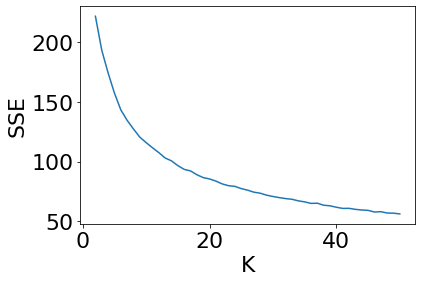

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2832968850541 silhouette =  0.1881114269887075

k =  4 SSE =  174.23662360999933 silhouette =  0.19005354320669365

k =  5 SSE =  157.384868962841 silhouette =  0.18582468513796402

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.26789153641366 silhouette =  0.18326798752564089

k =  9 SSE =  120.48838103732426 silhouette =  0.1866317057955536

k =  10 SSE =  115.56936661879239 silhouette =  0.16915571447859845

k =  11 SSE =  111.15746135942113 silhouette =  0.1698044525591508

k =  12 SSE =  107.14853890754993 silhouette =  0.171239464589733

k =  13 SSE =  103.77700814018526 silhouette =  0.16589037114084348

k =  14 SSE =  100.29333668206637 silhouette =  0.17486855959458156

k =  15 SSE =  96.41869125882857 silhouette =  0.17632213022776339

k =  16 SSE =  93.3330986291994 silhouette =  0.172939

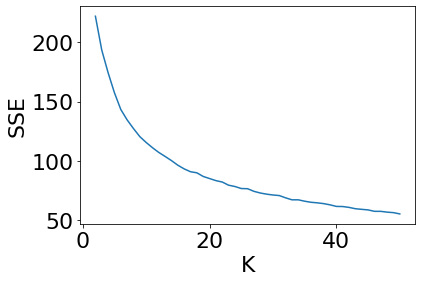

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.2375922780623 silhouette =  0.1908818410244209

k =  5 SSE =  157.36592466614582 silhouette =  0.18807408434531628

k =  6 SSE =  143.3347662795845 silhouette =  0.192765395175442

k =  7 SSE =  135.40552811751607 silhouette =  0.18648873031089166

k =  8 SSE =  127.1839908538116 silhouette =  0.18478991132349223

k =  9 SSE =  120.61272845807974 silhouette =  0.18051873746970085

k =  10 SSE =  115.30671216662257 silhouette =  0.16356347994103598

k =  11 SSE =  111.80025726942233 silhouette =  0.166218075361529

k =  12 SSE =  107.65746430181247 silhouette =  0.16291241226567832

k =  13 SSE =  103.63971184704724 silhouette =  0.15788483651759813

k =  14 SSE =  99.82536675917794 silhouette =  0.16607620912739016

k =  15 SSE =  97.19823863428921 silhouette =  0.16388001553879453

k =  16 SSE =  93.55312562026093 silhouette =  0.16667

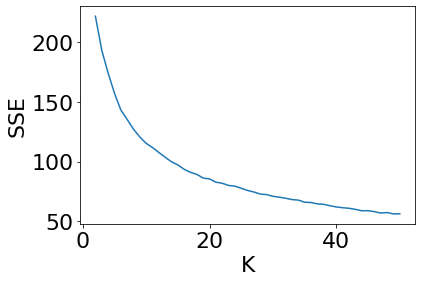

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.36755480054816 silhouette =  0.1884732224723401

k =  6 SSE =  143.33067031457784 silhouette =  0.19243550278224103

k =  7 SSE =  134.57313212431384 silhouette =  0.19130929255259566

k =  8 SSE =  127.17491250347128 silhouette =  0.18321803677852241

k =  9 SSE =  120.44896291109588 silhouette =  0.18486569465015362

k =  10 SSE =  116.22734635399809 silhouette =  0.18397713920245762

k =  11 SSE =  111.37998466312118 silhouette =  0.16606324515259302

k =  12 SSE =  107.33733332851901 silhouette =  0.1738452432742383

k =  13 SSE =  103.32041953314068 silhouette =  0.16927199621786426

k =  14 SSE =  100.45302620153421 silhouette =  0.16819039580261813

k =  15 SSE =  96.06666516377781 silhouette =  0.169564533057601

k =  16 SSE =  94.31559104153791 silhouette =  0.1

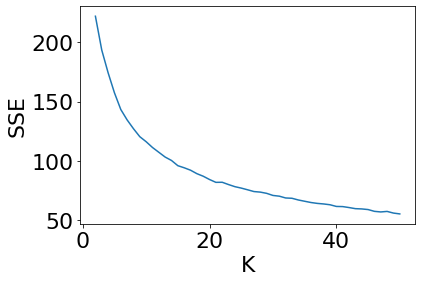

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27941522330212 silhouette =  0.18681140354887998

k =  4 SSE =  174.23696217763316 silhouette =  0.19079876195307238

k =  5 SSE =  157.38150355222587 silhouette =  0.18817533201467668

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.88278436689558 silhouette =  0.18796558434901364

k =  8 SSE =  127.23625107575236 silhouette =  0.18288499577716938

k =  9 SSE =  120.33779002694935 silhouette =  0.18905847589664526

k =  10 SSE =  115.37507531902936 silhouette =  0.16539146067809268

k =  11 SSE =  110.55543564463653 silhouette =  0.1688624092446662

k =  12 SSE =  107.01466466640994 silhouette =  0.1696807518236128

k =  13 SSE =  103.2879852189926 silhouette =  0.17246670499427452

k =  14 SSE =  100.02198345742292 silhouette =  0.17141026165406983

k =  15 SSE =  96.74074945779657 silhouette =  0.1653514763111666

k =  16 SSE =  93.91024513612349 silhouette =  0.

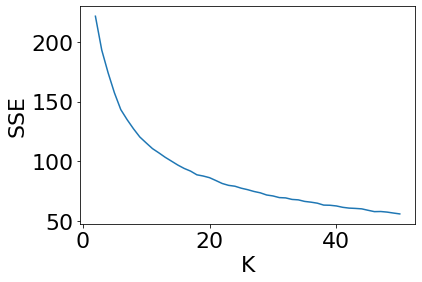

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.2800847536593 silhouette =  0.18672264683607345

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.39827319258282 silhouette =  0.1867328218923475

k =  6 SSE =  143.36001293479296 silhouette =  0.19204725436688302

k =  7 SSE =  134.6084429742597 silhouette =  0.1887688452458297

k =  8 SSE =  127.3212240564886 silhouette =  0.1777677584083373

k =  9 SSE =  120.44373806744343 silhouette =  0.18356287656277392

k =  10 SSE =  115.93026109227988 silhouette =  0.17923814455217987

k =  11 SSE =  111.84656125119135 silhouette =  0.1647830837936669

k =  12 SSE =  106.46822106705444 silhouette =  0.17222133470314896

k =  13 SSE =  103.68094281751561 silhouette =  0.16111512228617858

k =  14 SSE =  99.51935469384959 silhouette =  0.16573473647544026

k =  15 SSE =  96.46069390359267 silhouette =  0.16761949889536226

k =  16 SSE =  94.1351676503178 silhouette =  0.16438

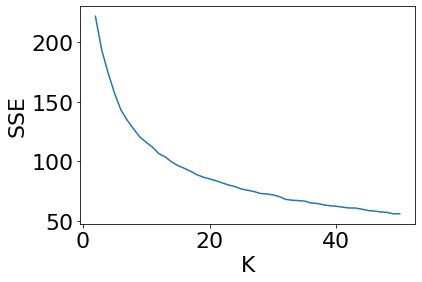

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28029454982396 silhouette =  0.18681140354887998

k =  4 SSE =  174.23649739598892 silhouette =  0.19056815668878102

k =  5 SSE =  157.37598357665564 silhouette =  0.18831714102984864

k =  6 SSE =  143.3418808624456 silhouette =  0.19194500697639963

k =  7 SSE =  134.6625526963339 silhouette =  0.19076677535331718

k =  8 SSE =  127.20969133561286 silhouette =  0.18486533523753185

k =  9 SSE =  120.45449523189464 silhouette =  0.1828963084512136

k =  10 SSE =  115.62356785173318 silhouette =  0.1767446378045174

k =  11 SSE =  111.51688755667523 silhouette =  0.16757133513840156

k =  12 SSE =  107.33008706909054 silhouette =  0.17038168203714796

k =  13 SSE =  103.76360812232976 silhouette =  0.16336919648208814

k =  14 SSE =  99.16450767818682 silhouette =  0.1759731601873217

k =  15 SSE =  96.93361459741871 silhouette =  0.1695879760873049

k =  16 SSE =  94.13550170261979 silhouette =  0.168

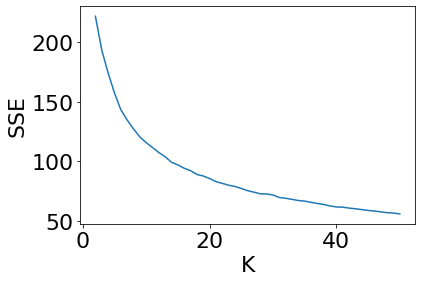

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27270521356408 silhouette =  0.1864350122592963

k =  4 SSE =  174.23734555349742 silhouette =  0.1897723372391272

k =  5 SSE =  157.40723365267894 silhouette =  0.1887254486228189

k =  6 SSE =  143.36328522459223 silhouette =  0.19304109026670438

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.3032186719005 silhouette =  0.18695107920061965

k =  9 SSE =  120.43826277738626 silhouette =  0.19028885244325006

k =  10 SSE =  115.32559062167445 silhouette =  0.1665246627993842

k =  11 SSE =  111.14539813938596 silhouette =  0.17039322455647235

k =  12 SSE =  107.37664707091564 silhouette =  0.16269791695662467

k =  13 SSE =  102.66023030553815 silhouette =  0.17347527990209255

k =  14 SSE =  99.67374055078452 silhouette =  0.1637429890855096

k =  15 SSE =  97.14214204711847 silhouette =  0.16467869222004936

k =  16 SSE =  93.91580369960911 silhouette =  0.171

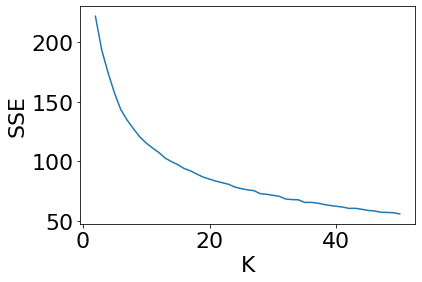

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27724395268316 silhouette =  0.18687956637032344

k =  4 SSE =  174.23080826189084 silhouette =  0.19056409727718673

k =  5 SSE =  157.40640707560098 silhouette =  0.18643858568780697

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.35611250735104 silhouette =  0.18073716309240354

k =  9 SSE =  120.45784204914153 silhouette =  0.18458294011719673

k =  10 SSE =  115.52247791336697 silhouette =  0.170910456561946

k =  11 SSE =  111.34751544567493 silhouette =  0.1679935697295831

k =  12 SSE =  106.44044522821427 silhouette =  0.17295776389835418

k =  13 SSE =  103.65621787280493 silhouette =  0.17034056925397897

k =  14 SSE =  99.89336143572052 silhouette =  0.17419818664266992

k =  15 SSE =  95.91009566834674 silhouette =  0.17325896064727478

k =  16 SSE =  94.04433691793616 silhouette =  0.1

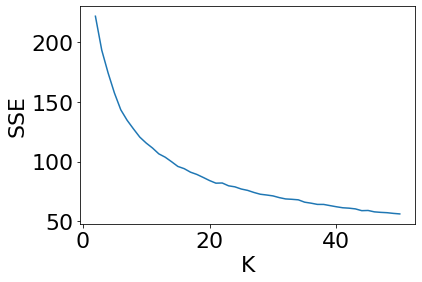

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.35676978552814 silhouette =  0.18346887036835988

k =  5 SSE =  157.3694134287024 silhouette =  0.18915409236358954

k =  6 SSE =  143.3347662795845 silhouette =  0.192765395175442

k =  7 SSE =  134.58252450872828 silhouette =  0.19117580397583647

k =  8 SSE =  127.23002846363215 silhouette =  0.17904514049114792

k =  9 SSE =  120.33822419168658 silhouette =  0.1893642132045963

k =  10 SSE =  115.72050891604044 silhouette =  0.18212450808831326

k =  11 SSE =  110.92903033765177 silhouette =  0.1668737154228014

k =  12 SSE =  107.6907334892153 silhouette =  0.1809699948735269

k =  13 SSE =  102.60466300265189 silhouette =  0.17355954270907578

k =  14 SSE =  99.60775894639673 silhouette =  0.16705357347929176

k =  15 SSE =  97.22193945180537 silhouette =  0.16045023891532542

k =  16 SSE =  93.4263888925096 silhouette =  0.1706853

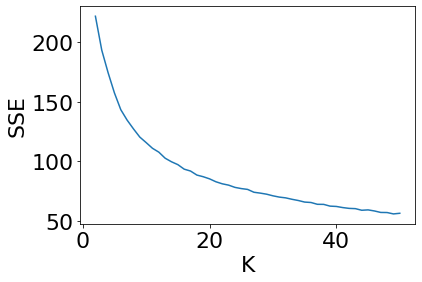

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28329688505414 silhouette =  0.1881114269887075

k =  4 SSE =  174.35611066048799 silhouette =  0.18374508342497559

k =  5 SSE =  157.39430733308714 silhouette =  0.18792512701339423

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.6021388385441 silhouette =  0.18853887828465588

k =  8 SSE =  127.19396652807954 silhouette =  0.17897888102036366

k =  9 SSE =  120.43941475695301 silhouette =  0.18834880545293983

k =  10 SSE =  115.22933090307667 silhouette =  0.16672750279988874

k =  11 SSE =  110.86930658056154 silhouette =  0.1664393607751729

k =  12 SSE =  106.59352494204687 silhouette =  0.17115847682997362

k =  13 SSE =  102.4913880411926 silhouette =  0.17400726700924013

k =  14 SSE =  100.0254391090908 silhouette =  0.17285632742977272

k =  15 SSE =  98.03830098182455 silhouette =  0.15750446638453902

k =  16 SSE =  94.2850088898287 silhouette =  0.168

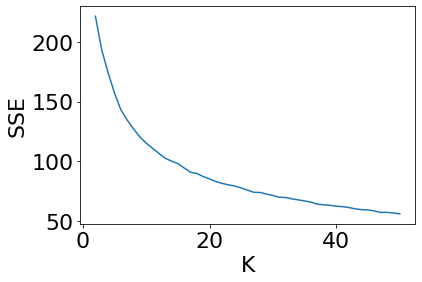

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23061940498116 silhouette =  0.19106177686702988

k =  5 SSE =  157.384976552426 silhouette =  0.1892812384613232

k =  6 SSE =  143.36206168195804 silhouette =  0.19315419826755353

k =  7 SSE =  134.5741799639103 silhouette =  0.18879241769204802

k =  8 SSE =  127.60019943307863 silhouette =  0.17460400264221504

k =  9 SSE =  120.43369358221621 silhouette =  0.1849247602017453

k =  10 SSE =  116.26127692152463 silhouette =  0.189596533092708

k =  11 SSE =  110.58262721401107 silhouette =  0.16756960791683795

k =  12 SSE =  106.97400077953286 silhouette =  0.1658768921063629

k =  13 SSE =  102.82796055188128 silhouette =  0.17287854521714527

k =  14 SSE =  99.83458516976287 silhouette =  0.1655910788696797

k =  15 SSE =  96.77255439175212 silhouette =  0.16780190536465633

k =  16 SSE =  93.91074817392834 silhouette =  0.1668449

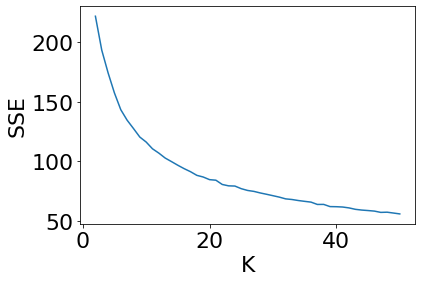

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27724395268322 silhouette =  0.18687956637032344

k =  4 SSE =  174.23134297880566 silhouette =  0.19020539561301808

k =  5 SSE =  157.41298724970244 silhouette =  0.18710809215326618

k =  6 SSE =  143.3338174170033 silhouette =  0.19265134585157245

k =  7 SSE =  134.576679821614 silhouette =  0.1885231678099895

k =  8 SSE =  127.26504609785533 silhouette =  0.1818244045505452

k =  9 SSE =  120.3556712259351 silhouette =  0.18918160104929843

k =  10 SSE =  115.29859331862104 silhouette =  0.16502268634239764

k =  11 SSE =  110.60823010660152 silhouette =  0.16758825365438604

k =  12 SSE =  107.95147012282871 silhouette =  0.16045082886550432

k =  13 SSE =  103.67316302253927 silhouette =  0.16137294220889367

k =  14 SSE =  100.20821770283419 silhouette =  0.16026654168523374

k =  15 SSE =  97.40846037053092 silhouette =  0.16266112302984603

k =  16 SSE =  93.78731022856715 silhouette =  0.16

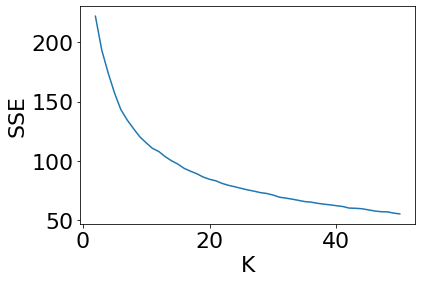

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23670481648705 silhouette =  0.19042043148322857

k =  5 SSE =  157.36613936115893 silhouette =  0.18786263791025953

k =  6 SSE =  143.3576075803444 silhouette =  0.19324670931777932

k =  7 SSE =  134.5917112120731 silhouette =  0.18887022291590572

k =  8 SSE =  127.18526285830562 silhouette =  0.1804408084922997

k =  9 SSE =  120.47498930598063 silhouette =  0.1826206019686559

k =  10 SSE =  115.26474335285 silhouette =  0.16911263184861952

k =  11 SSE =  110.9708913565156 silhouette =  0.16774231668016992

k =  12 SSE =  108.20374702611083 silhouette =  0.1694960838364691

k =  13 SSE =  103.60037957690919 silhouette =  0.16670967393034308

k =  14 SSE =  99.82032707139204 silhouette =  0.16765741263158188

k =  15 SSE =  96.95668652679878 silhouette =  0.16438922731580544

k =  16 SSE =  93.57416977600194 silhouette =  0.1663440

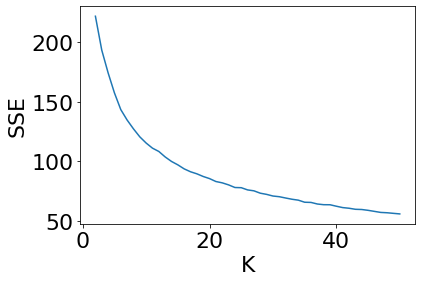

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.28254970102444 silhouette =  0.1881114269887075

k =  4 SSE =  174.23670481648705 silhouette =  0.19042043148322857

k =  5 SSE =  157.42381536953252 silhouette =  0.1877908433990164

k =  6 SSE =  143.33094961493552 silhouette =  0.19242974209952074

k =  7 SSE =  134.57513707356514 silhouette =  0.18864245909227614

k =  8 SSE =  127.22983203340294 silhouette =  0.1790585702420767

k =  9 SSE =  120.48003515138802 silhouette =  0.18458846626820072

k =  10 SSE =  115.45616334122097 silhouette =  0.1718145555717605

k =  11 SSE =  111.47203098263795 silhouette =  0.17533214662344318

k =  12 SSE =  106.65238277186617 silhouette =  0.17018967276330543

k =  13 SSE =  103.61368499609426 silhouette =  0.16432403466645998

k =  14 SSE =  100.15595408838772 silhouette =  0.17037331677847148

k =  15 SSE =  96.89940334833457 silhouette =  0.17784153979325398

k =  16 SSE =  93.52941173318249 silhouette =  0.

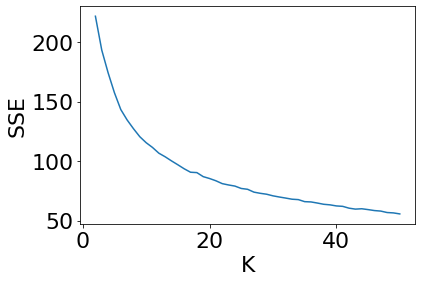

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27968646670527 silhouette =  0.1865358128155909

k =  4 SSE =  174.2560156086308 silhouette =  0.19084690956179767

k =  5 SSE =  157.3838965708678 silhouette =  0.18581407621149032

k =  6 SSE =  143.3332740409822 silhouette =  0.1919388299929591

k =  7 SSE =  134.77003693569418 silhouette =  0.1889103252660917

k =  8 SSE =  127.45895142979694 silhouette =  0.1806330258773167

k =  9 SSE =  120.33026095909624 silhouette =  0.18961484423496613

k =  10 SSE =  116.04395549801886 silhouette =  0.1597096458092473

k =  11 SSE =  110.66618961377502 silhouette =  0.16699813409450529

k =  12 SSE =  107.01220192407911 silhouette =  0.16891778792999165

k =  13 SSE =  103.4071871738612 silhouette =  0.16149459394444104

k =  14 SSE =  99.8246460579776 silhouette =  0.1764582738980845

k =  15 SSE =  97.0756355601975 silhouette =  0.16804353866372387

k =  16 SSE =  93.42388274608673 silhouette =  0.166420157

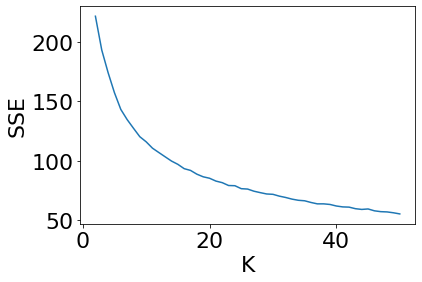

k =  2 SSE =  221.7281011885144 silhouette =  0.2577115109984599

k =  3 SSE =  193.27648499942134 silhouette =  0.18687956637032344

k =  4 SSE =  174.23698243552406 silhouette =  0.19033287192948573

k =  5 SSE =  157.40163058429363 silhouette =  0.18574842191117596

k =  6 SSE =  143.33170325115344 silhouette =  0.1922003444400098

k =  7 SSE =  134.57237215438417 silhouette =  0.18853501634225805

k =  8 SSE =  127.27416346894161 silhouette =  0.17994735349499125

k =  9 SSE =  120.48313376317465 silhouette =  0.1848525240491901

k =  10 SSE =  115.27027694016229 silhouette =  0.16695665877230384

k =  11 SSE =  111.14257732975963 silhouette =  0.17112887827849052

k =  12 SSE =  106.6035533441731 silhouette =  0.1708948036579935

k =  13 SSE =  103.27960001700009 silhouette =  0.1671485457249001

k =  14 SSE =  101.01642748051094 silhouette =  0.1596973703925538

k =  15 SSE =  97.0000480535495 silhouette =  0.16382821626817748

k =  16 SSE =  93.43830768390661 silhouette =  0.164

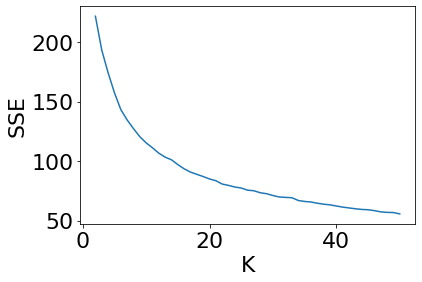

In [12]:
for i in range(0, 50):
    sse_list = list()
    max_k = 50
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, algorithm='full')
        kmeans.fit(train_data)
        sse = kmeans.inertia_
        sse_list.append(sse)

        print("k = ", k, "SSE = ", sse, "silhouette = ", silhouette_score(train_data, kmeans.labels_))
        print()
        
    plt.plot(range(2, len(sse_list) + 2), sse_list)
    plt.ylabel('SSE', fontsize=22)
    plt.xlabel('K', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

In [13]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', n_init=1000, max_iter=10000, algorithm='full')
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(train_data, kmeans.labels_))

centers [[0.58201058 0.15972222 0.32346273 0.27287559 0.65046296 0.15798611]
 [0.45866402 0.15128968 0.27611499 0.16233534 0.30347222 0.54817708]
 [0.41097308 0.33229814 0.56848515 0.79074567 0.26376812 0.24275362]
 [0.4526661  0.79106074 0.33306881 0.1942723  0.30988024 0.26272455]
 [0.42284282 0.16514501 0.70390561 0.17335474 0.28984962 0.22791353]
 [0.38549618 0.16262268 0.23764626 0.14637951 0.21698473 0.11211832]]

labels {0: 108, 1: 144, 2: 69, 3: 167, 4: 133, 5: 262}
sse 143.33094961493552
silhouette 0.19242974209952074


In [14]:
diz_kmeans_3 = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_3['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_3['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_3['sse'] = float(kmeans.inertia_)
diz_kmeans_3['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))

In [15]:
with open('diz_kmeans_3.json', 'w') as fp:
    json.dump(diz_kmeans_3, fp, indent=4)

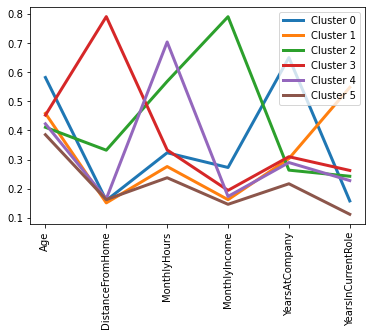

In [16]:
for i in range(0, 6):
    plt.plot(range(0, 6), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
    
plt.xticks(range(0, 6), list(df_copy.columns), rotation = 90)
plt.legend()
plt.show()

In [17]:
df_clusters_3 = df_copy.copy()

In [18]:
df_clusters_3['Labels'] = kmeans.labels_

In [19]:
df_clusters_3

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,Labels
0,0.809524,0.285714,0.231122,0.286171,0.40,0.4375,1
1,0.428571,0.000000,0.233476,0.147183,0.05,0.5000,1
2,0.166667,0.535714,0.747017,0.144644,0.05,0.3125,4
3,0.357143,0.142857,0.435214,0.068878,0.15,0.4375,1
4,0.309524,0.285714,0.142192,0.204325,0.50,0.1250,5
...,...,...,...,...,...,...,...
878,0.476190,0.392857,0.453907,0.166769,0.50,0.0000,0
879,0.452381,0.535714,0.088947,0.042558,0.85,0.0000,0
880,0.357143,0.178571,0.436931,0.159227,0.55,0.4375,1
881,0.357143,0.107143,0.323273,0.057373,0.15,0.1250,5


In [20]:
df_clusters_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyHours        883 non-null    float64
 3   MonthlyIncome       883 non-null    float64
 4   YearsAtCompany      883 non-null    float64
 5   YearsInCurrentRole  883 non-null    float64
 6   Labels              883 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 45.0 KB


In [21]:
np.unique(df_clusters_3['Labels'])

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [22]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([108, 144,  69, 167, 133, 262]))

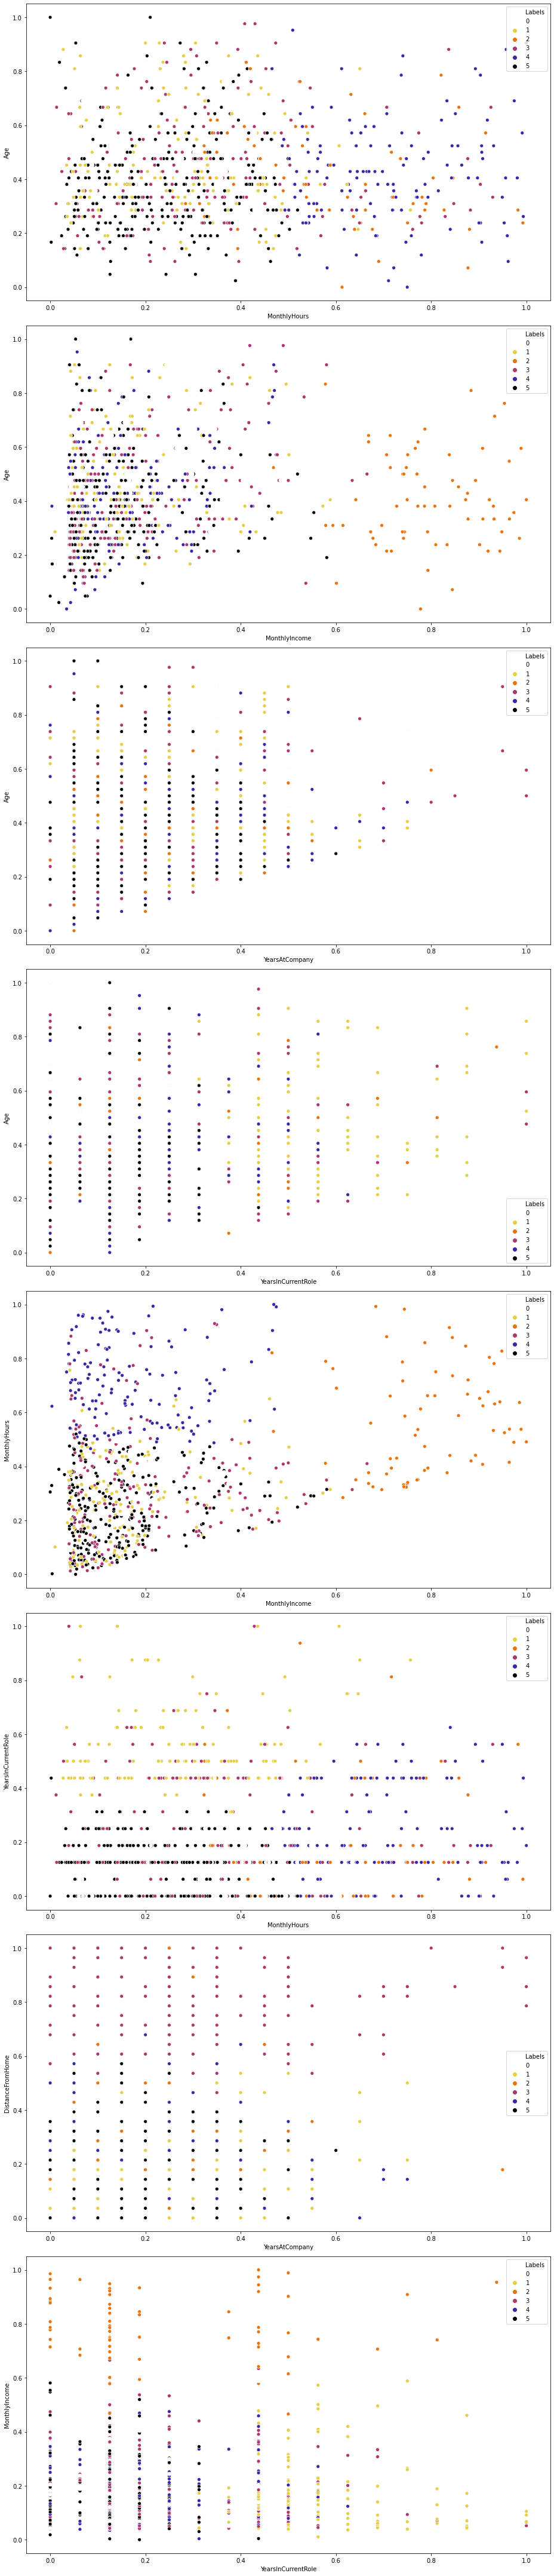

In [23]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize = (13,60))

sns.scatterplot(x = 'MonthlyHours', y = 'Age', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'MonthlyIncome', y = 'MonthlyHours', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'YearsInCurrentRole', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'DistanceFromHome', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df_clusters_3, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)


plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [29]:
scaler = MinMaxScaler()

In [30]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [31]:
df_NON_normalized_reduct = pd.DataFrame()

col_to_add = ['Age', 'DistanceFromHome', 'MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole']

for element in col_to_add:
    df_NON_normalized_reduct[element] = df_NON_normalized[element]
    
df_NON_normalized_reduct

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,52,9,156.61,8446,8,7
1,36,1,157.94,4834,1,8
2,25,16,448.06,4768,1,5
3,33,5,271.91,2799,3,7
4,31,9,106.37,6319,10,2
...,...,...,...,...,...,...
878,38,12,282.47,5343,10,0
879,37,16,76.29,2115,17,0
880,33,6,272.88,5147,11,7
881,33,4,208.67,2500,3,2


In [32]:
X = scaler.fit_transform(df_NON_normalized_reduct.values)

In [33]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

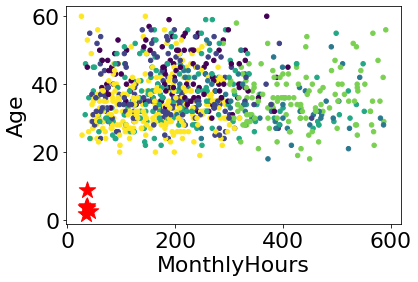

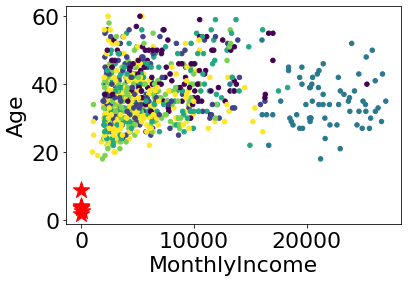

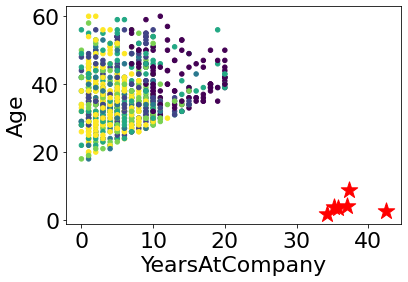

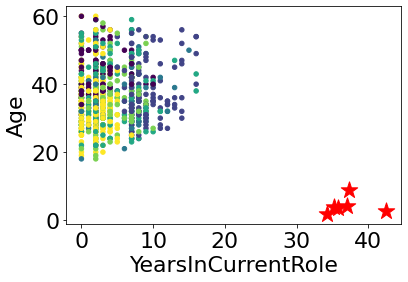

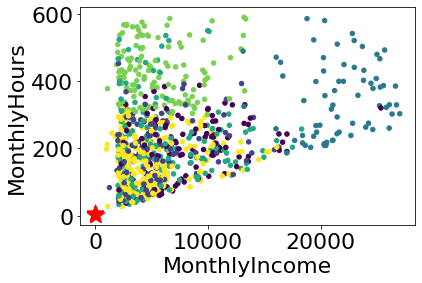

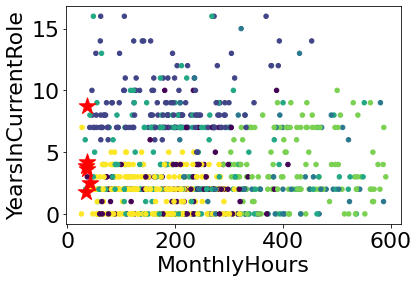

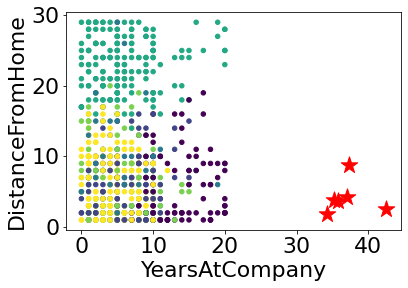

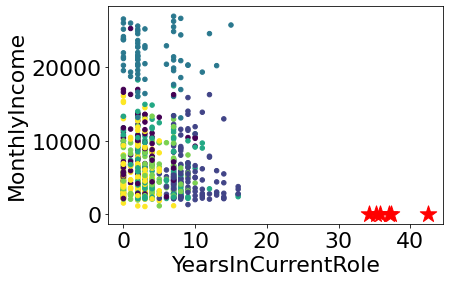

In [37]:
features_to_plot = [('MonthlyHours', 'Age'), ('MonthlyIncome', 'Age'),('YearsAtCompany', 'Age'), 
                    ('YearsInCurrentRole', 'Age'), ('MonthlyIncome', 'MonthlyHours'), 
                    ('MonthlyHours', 'YearsInCurrentRole'), ('YearsAtCompany', 'DistanceFromHome'),
                    ('YearsInCurrentRole', 'MonthlyIncome')]

for a, b in features_to_plot:
    plt.scatter(df_NON_normalized_reduct[a], df_NON_normalized_reduct[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 5], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

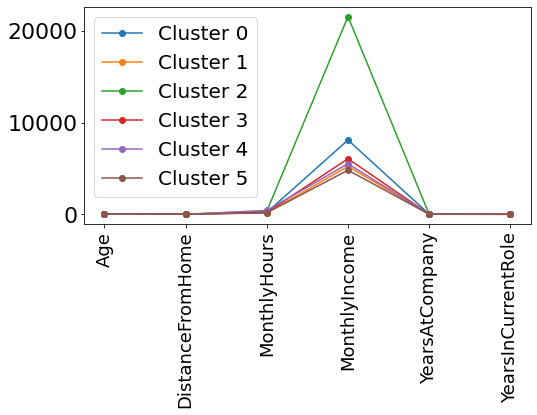

In [35]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_copy.columns)), df_copy.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

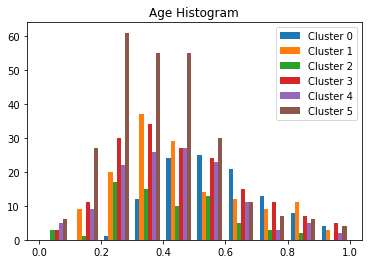

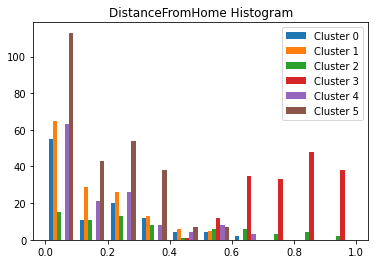

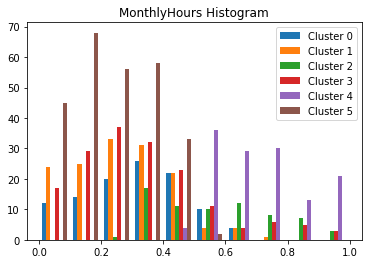

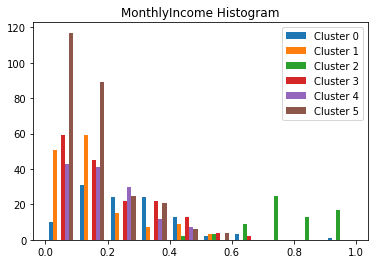

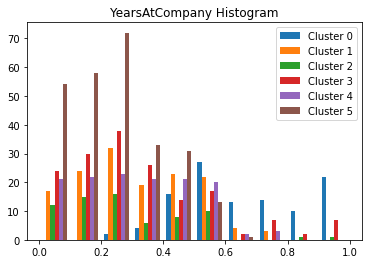

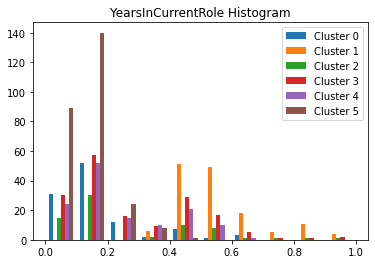

In [26]:
for column in df_copy.columns:
    
    cluster_list = []
    list_num_cluster = []
    
    for num_cluster in np.unique(df_clusters_3['Labels']):
        cluster_list.append(df_clusters_3[df_clusters_3['Labels'] == num_cluster][column])  #distribution
        list_num_cluster.append('Cluster %s' % num_cluster)                                 #num cluster
           
    plt.hist(cluster_list, label = list_num_cluster)
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

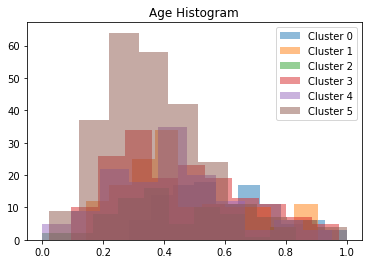

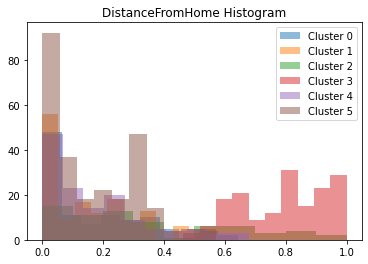

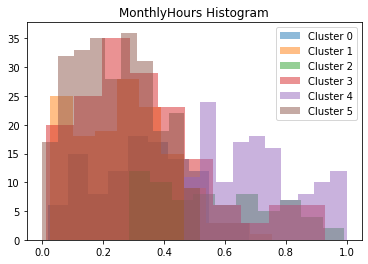

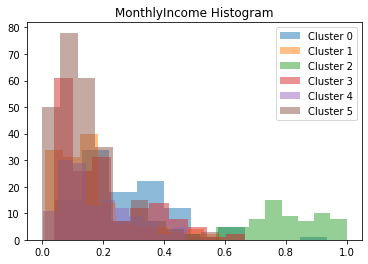

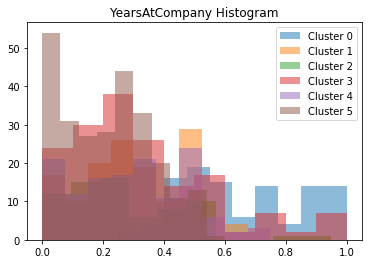

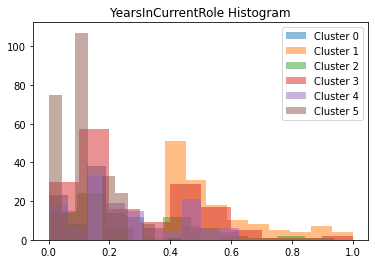

In [27]:
for column in df_copy.columns:
    
    for num_cluster in np.unique(df_clusters_3['Labels']):
        plt.hist(df_clusters_3[df_clusters_3['Labels'] == num_cluster][column], 
                 alpha = 0.5, label = 'Cluster %s' % num_cluster)       
    
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

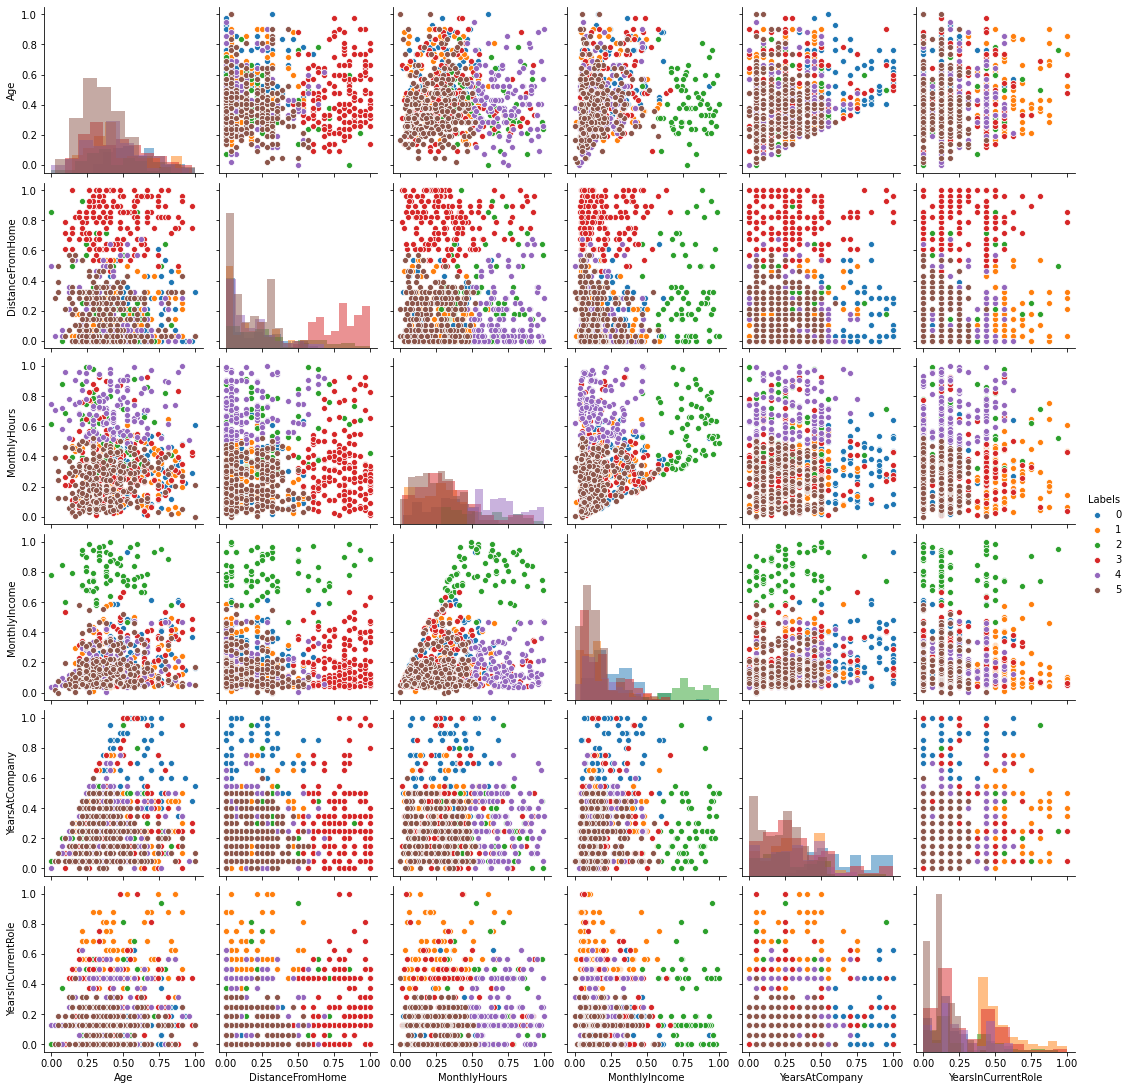

In [28]:
sns.pairplot(df_clusters_3, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")